In [ ]:
import pandas as pd
import datetime
df = pd.read_excel("/content/previous_loan.xlsx", sheet_name="train_previous_loan")
df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,100000000,130000000,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,100000000,130000000,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,200000000,238000000,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,100000000,115000000,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,100000000,115000000,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24090 entries, 0 to 24089
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerid       24090 non-null  object
 1   systemloanid     24090 non-null  int64 
 2   loannumber       24090 non-null  int64 
 3   approveddate     24090 non-null  object
 4   creationdate     24090 non-null  object
 5   loanamount       24090 non-null  int64 
 6   totaldue         24090 non-null  int64 
 7   termdays         24090 non-null  int64 
 8   closeddate       24090 non-null  object
 9   referredby       1351 non-null   object
 10  firstduedate     24090 non-null  object
 11  firstrepaiddate  24090 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.2+ MB


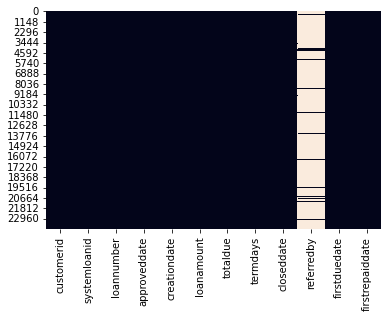

In [ ]:
import seaborn as sns
df.isnull()
df.info(verbose=True,null_counts=True)
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.drop(['referredby'], axis=1, inplace = True)
df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,100000000,130000000,30,2016-09-01 16:06:48.000000,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,100000000,130000000,30,2017-05-28 14:44:49.000000,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,200000000,238000000,30,2017-04-26 22:18:56.000000,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,100000000,115000000,15,2017-04-24 01:35:52.000000,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,100000000,115000000,15,2017-07-14 21:18:43.000000,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


Resta entre el creation y approved date

In [ ]:
from datetime import datetime

df['approveddate'] = pd.to_datetime(df['approveddate'], exact=False)
df['creationdate'] = pd.to_datetime(df['creationdate'], exact=False)
df['datediff'] = (df['approveddate'] - df['creationdate'])
df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate,datediff
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,100000000,130000000,30,2016-09-01 16:06:48.000000,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000,0 days 01:00:08
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,100000000,130000000,30,2017-05-28 14:44:49.000000,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000,0 days 01:00:14
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,200000000,238000000,30,2017-04-26 22:18:56.000000,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000,0 days 01:00:06
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,100000000,115000000,15,2017-04-24 01:35:52.000000,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000,0 days 01:00:13
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,100000000,115000000,15,2017-07-14 21:18:43.000000,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000,0 days 01:00:07


In [ ]:
import numpy as np
df['datediffseconds'] = df['datediff'].astype('timedelta64[s]').astype(np.int32) 
df

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,firstduedate,firstrepaiddate,datediff,datediffseconds
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,100000000,130000000,30,2016-09-01 16:06:48.000000,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000,0 days 01:00:08,3608
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,100000000,130000000,30,2017-05-28 14:44:49.000000,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000,0 days 01:00:14,3614
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,200000000,238000000,30,2017-04-26 22:18:56.000000,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000,0 days 01:00:06,3606
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,100000000,115000000,15,2017-04-24 01:35:52.000000,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000,0 days 01:00:13,3613
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,100000000,115000000,15,2017-07-14 21:18:43.000000,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000,0 days 01:00:07,3607
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24085,8a858f085b494826015b54a0b2a1093b,301861709,1,2017-04-09 23:04:32,2017-04-09 22:04:10,100000000,130000000,30,2017-05-02 22:27:03.000000,2017-05-09 00:00:00.000000,2017-05-02 22:11:54.000000,0 days 01:00:22,3622
24086,8a858f565b683b56015b7391c2617960,301869817,1,2017-04-15 23:33:17,2017-04-15 22:33:05,100000000,115000000,15,2017-04-25 19:32:42.000000,2017-05-02 00:00:00.000000,2017-04-25 19:17:33.000000,0 days 01:00:12,3612
24087,8a858fab5b9105dc015b975e594e394a,301952446,1,2017-06-26 15:46:28,2017-06-26 14:45:20,100000000,130000000,30,2017-07-13 13:12:43.000000,2017-07-26 00:00:00.000000,2017-07-13 13:02:34.000000,0 days 01:01:08,3668
24088,8a858fcf5b39c3ba015b39c7691603e1,301887884,2,2017-05-03 06:56:10,2017-05-03 05:56:04,100000000,130000000,30,2017-06-01 22:00:17.000000,2017-06-02 00:00:00.000000,2017-06-01 21:50:07.000000,0 days 01:00:06,3606


In [ ]:
df.drop(['approveddate', 'creationdate','datediff','closeddate','firstduedate','firstrepaiddate','systemloanid'], axis=1, inplace = True)
df.head()

,customerid,loannumber,loanamount,totaldue,termdays,datediffseconds
0,8a2a81a74ce8c05d014cfb32a0da1049,2,100000000,130000000,30,3608
1,8a2a81a74ce8c05d014cfb32a0da1049,9,100000000,130000000,30,3614
2,8a2a81a74ce8c05d014cfb32a0da1049,8,200000000,238000000,30,3606
3,8a8588f35438fe12015444567666018e,5,100000000,115000000,15,3613
4,8a85890754145ace015429211b513e16,2,100000000,115000000,15,3607


In [ ]:
df = df.groupby('customerid', as_index=False).mean()
df

,customerid,loannumber,loanamount,totaldue,termdays,datediffseconds
0,8a1088a0484472eb01484669e3ce4e0b,1.0,1.000000e+08,1.150000e+08,15.000000,3668.000000
1,8a1a1e7e4f707f8b014f797718316cad,2.5,1.750000e+08,2.237500e+08,37.500000,3622.750000
2,8a1a32fc49b632520149c3b8fdf85139,4.0,1.285714e+08,1.521429e+08,19.285714,3618.571429
3,8a1eb5ba49a682300149c3c068b806c7,4.5,1.625000e+08,2.030000e+08,33.750000,3616.500000
4,8a1edbf14734127f0147356fdb1b1eb2,1.5,1.000000e+08,1.225000e+08,22.500000,3637.500000
...,...,...,...,...,...,...
5796,8a858fff5c79144c015c7bdbfc086ce1,1.0,1.000000e+08,1.300000e+08,30.000000,3613.000000
5797,8aaae7a74400b28201441c8b62514150,2.0,1.000000e+08,1.250000e+08,25.000000,3615.333333
5798,8aab10f748cf78ff0148d11fac1447a6,1.0,1.000000e+08,1.300000e+08,30.000000,3669.000000
5799,8aab160f499477da014999ba2f0f578b,2.0,1.000000e+08,1.175000e+08,20.000000,3627.333333


In [ ]:
df = df.rename(columns={'loannumber': 'loannumberprevious', 'loanamount': 'loanamountprevious', 'totaldue': 'totaldueprevious', 'termdays': 'termdaysprevious', 'datediffseconds': 'datediffsecondsprevious'})
df

,customerid,loannumberprevious,loanamountprevious,totaldueprevious,termdaysprevious,datediffsecondsprevious
0,8a1088a0484472eb01484669e3ce4e0b,1.0,1.000000e+08,1.150000e+08,15.000000,3668.000000
1,8a1a1e7e4f707f8b014f797718316cad,2.5,1.750000e+08,2.237500e+08,37.500000,3622.750000
2,8a1a32fc49b632520149c3b8fdf85139,4.0,1.285714e+08,1.521429e+08,19.285714,3618.571429
3,8a1eb5ba49a682300149c3c068b806c7,4.5,1.625000e+08,2.030000e+08,33.750000,3616.500000
4,8a1edbf14734127f0147356fdb1b1eb2,1.5,1.000000e+08,1.225000e+08,22.500000,3637.500000
...,...,...,...,...,...,...
5796,8a858fff5c79144c015c7bdbfc086ce1,1.0,1.000000e+08,1.300000e+08,30.000000,3613.000000
5797,8aaae7a74400b28201441c8b62514150,2.0,1.000000e+08,1.250000e+08,25.000000,3615.333333
5798,8aab10f748cf78ff0148d11fac1447a6,1.0,1.000000e+08,1.300000e+08,30.000000,3669.000000
5799,8aab160f499477da014999ba2f0f578b,2.0,1.000000e+08,1.175000e+08,20.000000,3627.333333


In [ ]:
df.to_csv('previous_loan_limpio.csv', index=False)